In [1]:
import mido
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

# tf.compat.v1.enable_eager_execution()

In [2]:
mid1 = mido.MidiFile('satie.mid')
mid2 = mido.MidiFile('prokofiev.mid')

In [4]:
def midi2arr(messages):
    l = []
    
    for m in messages:
        if m.type == 'note_on' and m.velocity > 0:
            l.append([m.note, m.velocity])
    
    a = np.array(l, dtype=float)
    a[...,0] /= 127
    a[...,1] /= 127 
            
    return a

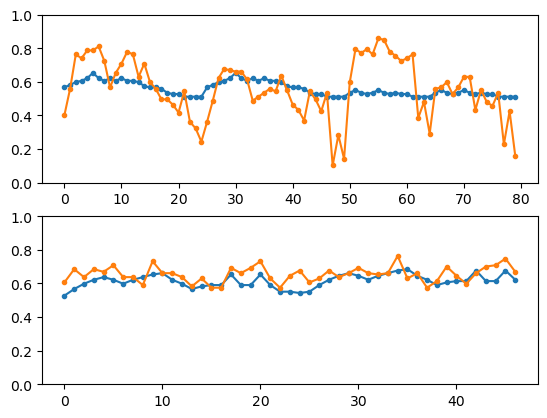

In [5]:
midivel1 = midi2arr(mid1)
midivel2 = midi2arr(mid2)

figure, axis = plt.subplots(2, 1)

axis[0].plot(midivel1, '.-')
axis[0].set_ylim([0, 1])
axis[1].plot(midivel2, '.-')
axis[1].set_ylim([0, 1])

plt.show()

In [34]:
def plot_res(pred, content, style):
    plt.plot(pred, label='result')
    plt.plot(content, label='content')
    plt.plot(style, label='style')
    
    plt.legend()
    plt.show()

In [35]:
ALPHA = 0.5
BETA = 0.5

In [53]:
def style_loss(pred, style):    
    return tf.math.abs(tf.math.reduce_std(pred) - tf.math.reduce_std(style))

def content_loss(pred, content):
    return tf.math.reduce_mean(tf.math.square(pred - content))

def overall_loss(pred, content, style):
    return ALPHA * style_loss(pred, style) + BETA * content_loss(pred, content)

In [54]:
@tf.function()
def train_step(vel):
    with tf.GradientTape() as tape:
        loss = overall_loss(vel, content, style)

    grad = tape.gradient(loss, vel)
    opt.apply_gradients([(grad, vel)])

In [55]:
content = midivel2[...,1]
style = midivel1[...,1]
vel = tf.Variable(content)

In [56]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

.

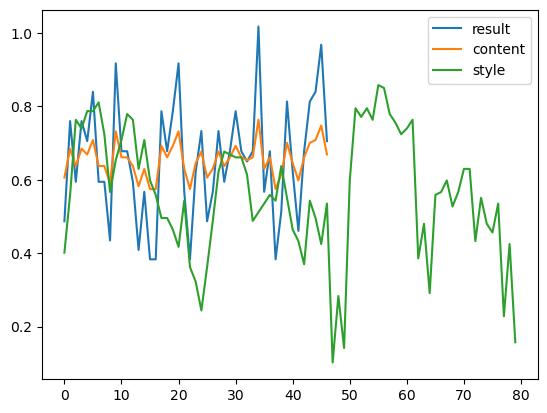

Train step: 200
.

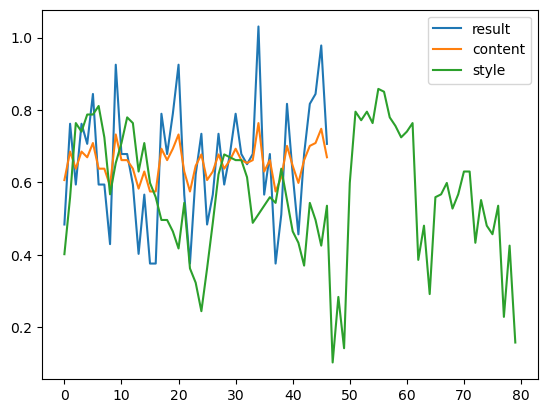

Train step: 400
.

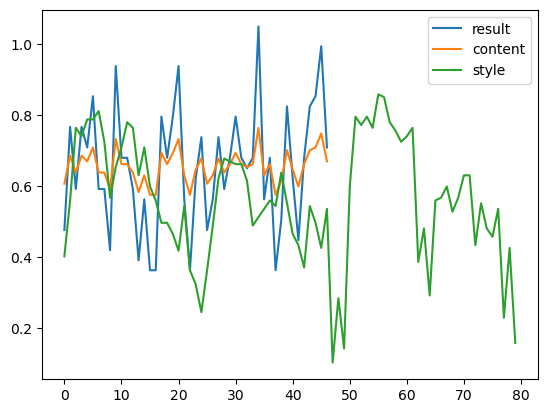

Train step: 600
.

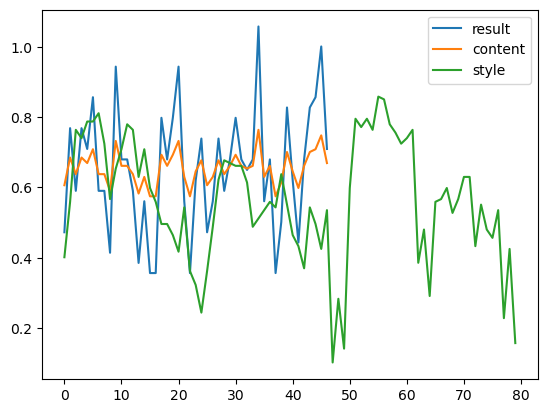

Train step: 800
.

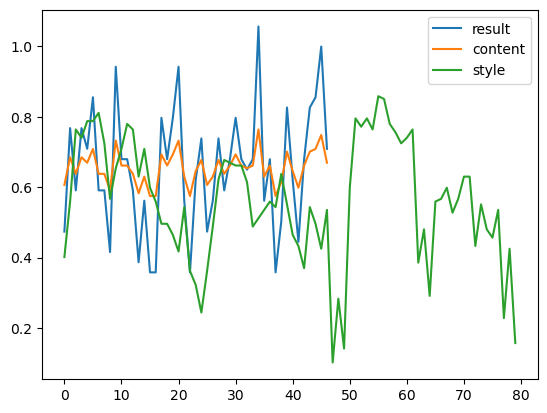

Train step: 1000
Total time: 1.3


In [57]:
import time
start = time.time()

epochs = 5
steps_per_epoch = 200

step = 0
for n in range(epochs):
    for m in range(steps_per_epoch):
        step += 1
        train_step(vel)
    print(".", end='', flush=True)
    plot_res(vel.numpy(), content, style)
    print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))